<a href="https://colab.research.google.com/github/pranavkriya/portfolio/blob/main/Facebook_EDA/facebook_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/pseudo_facebook.csv')
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [ ]:
df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [ ]:
## Null Values

df.isna().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

there are only a little amount of null values so dropping them

In [ ]:
df.dropna(inplace=True)

**<h1>EDA Starts</h1>**

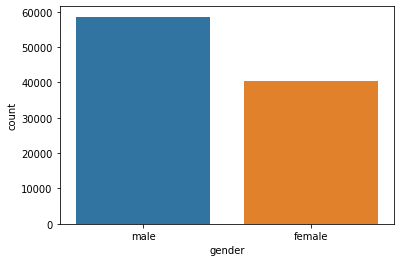

In [ ]:
sns.countplot(df.gender)

1.  Proportion of male are greater than female

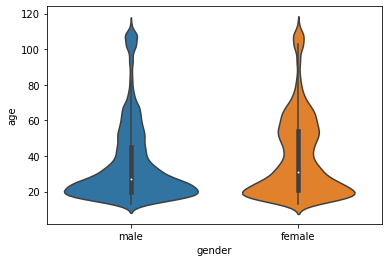

In [ ]:
## age 
sns.violinplot(y=df.age, x=df.gender)

2. As we can see most people have their ages from 10 to 40 in both male and female
3. Both the sections are following same type of trend.

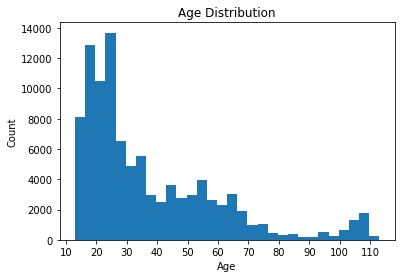

In [ ]:
plt.hist(df.age, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(np.arange(10,120,10))
plt.show()

4. Above distribution is showing that people above 100 are more active over facebook then people having range 75 - 100

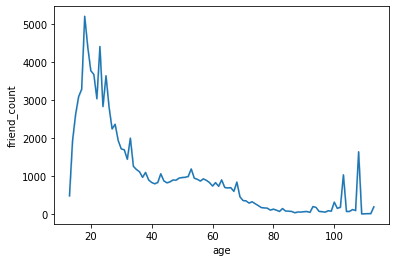

In [ ]:
sns.lineplot(df.age, df.friend_count,estimator=len)

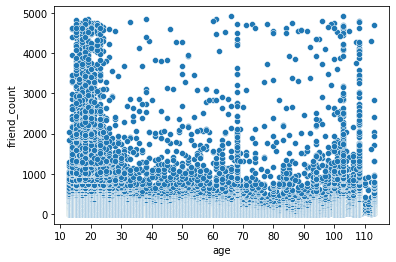

In [ ]:
sns.scatterplot(df.age, df.friend_count,estimator=np.mean)
plt.xticks(np.arange(10,120,10))
plt.show()

Above graph is showing that most people between 14 to 30 have a huge freind count and people having age more than 105 have high friend count 

---



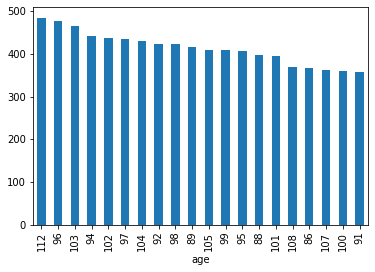

In [ ]:
## relation between age and number of friends(mean)

df.groupby(['age'])['friend_count'].mean().sort_values(ascending=False).head(20).plot(kind='bar')

In [ ]:
## lets make ea new category friendship_received

df['friend_received'] = df.friend_count - df.friendships_initiated

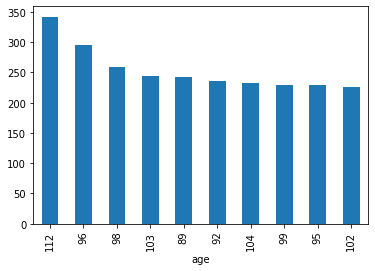

In [ ]:
df.groupby(['age'])['friend_received'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

Above graph shows that higher aged group people are more popular among other age group people

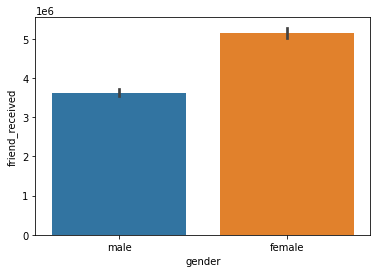

In [ ]:
sns.barplot(x=df.gender, y=df.friend_received, estimator=sum)

As per the trend , females tend to receive more friend request than male

In [ ]:
df.groupby(['gender'])['friend_received'].sum()

gender
female    5155272
male      3629764
Name: friend_received, dtype: int64

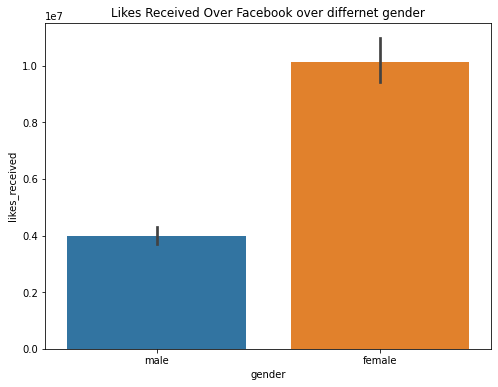

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=df.gender, y=df.likes_received, estimator=sum)
plt.title('Likes Received Over Facebook over differnet gender')
plt.show()

As per the trend , females tend to receive more likes than male

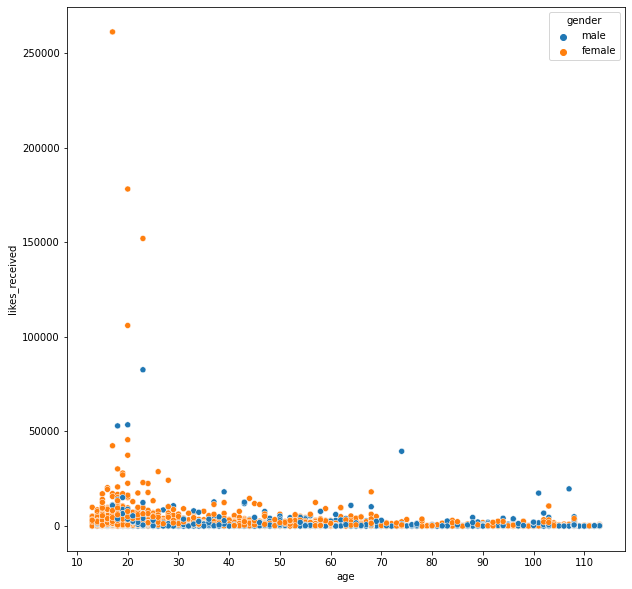

In [ ]:
## relation between likes_received, age, gender
plt.figure(figsize=(10,10))
sns.scatterplot(df.age, df.likes_received,estimator=sum, hue = df.gender)
plt.xticks(np.arange(10,120,10))
plt.show()

Above graph shows that females from 13 to 31 are most popular in receiving likes over facebook

In [ ]:
df.groupby(['age', 'gender'])['likes_received'].sum()

age  gender
13   female     69115
     male        7062
14   female    231168
     male       51702
15   female    541092
                ...  
111  male         249
112  female       677
     male         534
113  female     13367
     male        6925
Name: likes_received, Length: 202, dtype: int64